# Séries temporais

## Decomposição de séries temporais

Uma série temporal pode ser decomposta nos seguintes **componentes**:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é **crescente**, **decrescente** ou **estável**. Além disso, a tendência indica também a velocidade destas mudanças. 

- **Ciclos (C)**: são  **oscilações de subida e de queda nas séries**, de forma **suave e repetida**, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.

- **Sazonalidade (S)**: são **oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia**. Estes movimentos são facilmente previsíveis, ocorrendo em **intervalos regulares de tempo**. 

- **Ruído Aleatório (\\( \epsilon \\))**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.

Algumas ilustrações:

<img src="https://www.datavedas.com/wp-content/uploads/2018/04/3.1.3.1-Introduction-to-Time-Series-Data-R.jpg" width=600>

<br>

<img src="https://i2.wp.com/itfeature.com/wp-content/uploads/2014/06/Component-of-Time-Series-Data.jpg?resize=661%2C599" width=600>

A partir da sazonalidade, pode-se classificar uma série temporal em **aditiva ou multiplicativa**:

- A **série é aditiva**,  magnitude da **sazonalidade mantém-se constante** ao longo do prazo; 
- A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**

<img src="https://miro.medium.com/max/564/1*LdeXlKrgNkFUjOhnO4Zzaw.jpeg" width=600>

Mais formalmente, uma série temporal \\( Z(t) \\) pode ser reconstruída através de uma **função que depende das componentes acima** \\(  f(T_t,C_t,S_t,\epsilon_t) \\). 

- Uma **série aditiva** é representada por \\( Z(t)=T_t+C_t+S_t+\epsilon_t \\);

- Uma **série multiplicativa** é representada por por \\( Z(t)=T_t \times C_t \times  S_t \times \epsilon_t \\).

> **Exemplo**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9a0420ad-f498-4d2e-9a2b-28a224ccbdf5.png" width=600>

> **Exemplo**: No exemplo abaixo é representado a média da temperatuda diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/ec935a3f-daf0-4fff-a99f-5bc3c2a906d3.png" width=600>

Para observarmos as componentes acima, podemos utilizar a biblioteca [statsmodels](https://www.statsmodels.org/stable/index.html), que é muito uytilizada para a construção de modelos estatísticos.

Vamos falar bastante desta biblioteca nas próximas aulas!

A funão `seasonal_decompose` proporciona a decomposição de séries temporais de forma simples e rápida (embora haja métodos mais elaborados e precisos).

```python
from statsmodels.tsa.seasonal import seasonal_decompose

# faz a decomposição, com o parâmetro period=252m que indica o número aproximado de dias úteis no ano
comps = seasonal_decompose(precos, period=252)

# plot as componentes
comps.plot()
plt.show()
```





In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from pandas_datareader.data import DataReader

# simbolo do ativo
simbolo = 'ITUB3.SA'

# lê os dados da série de preços
df = DataReader(simbolo, data_source='yahoo', start='2010')
precos = df["Adj Close"]

In [14]:
precos

Date
2010-01-04     8.465152
2010-01-05     8.478789
2010-01-06     8.478789
2010-01-07     8.397002
2010-01-08     8.301578
                ...    
2021-11-08    20.610001
2021-11-09    20.389999
2021-11-10    20.900000
2021-11-11    20.910000
2021-11-12    20.879999
Name: Adj Close, Length: 2932, dtype: float64

In [15]:
# necessário pra preencher datas faltando -- isso é importante para os modelos!
idx = pd.date_range(precos.index[0], precos.index[-1])
precos.index = pd.DatetimeIndex(precos.index)
precos = precos.reindex(idx, method='ffill')

In [16]:
precos

2010-01-04     8.465152
2010-01-05     8.478789
2010-01-06     8.478789
2010-01-07     8.397002
2010-01-08     8.301578
                ...    
2021-11-08    20.610001
2021-11-09    20.389999
2021-11-10    20.900000
2021-11-11    20.910000
2021-11-12    20.879999
Freq: D, Name: Adj Close, Length: 4331, dtype: float64

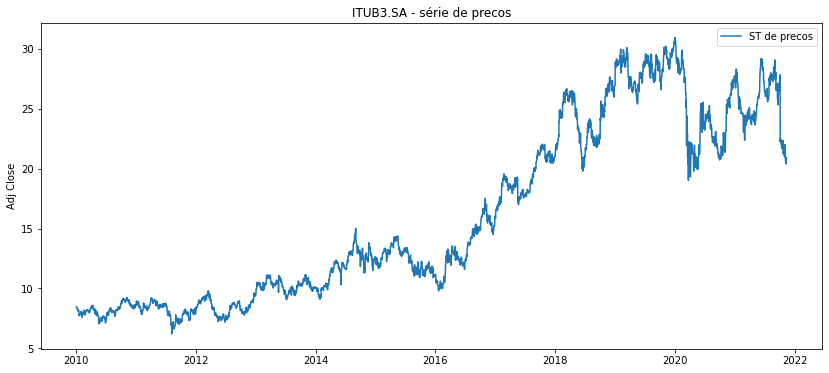

In [18]:
plt.figure(figsize=(14, 6))
plt.title(simbolo + " - série de precos")

sns.lineplot(x=precos.index, y=precos, label="ST de precos")

plt.legend()
plt.show()

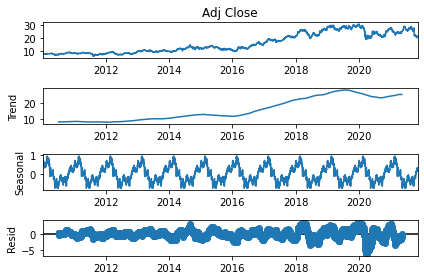

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# faz a decomposição, com o parâmetro 
comps = seasonal_decompose(precos, period=365)

# plot as componentes
comps.plot()
plt.show()

Exemplo 2

In [24]:
df_flights = sns.load_dataset('flights')
df_flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [25]:
# criando o intervalo de tempo (internacional) - cria automaticamente os dados
df_flights.index = pd.date_range(start="1949-01", periods=len(df_flights), freq='M')

In [28]:
# os dados de tempo estão no index
df_flights.drop(columns=['year','month'], inplace=True)

<AxesSubplot:>

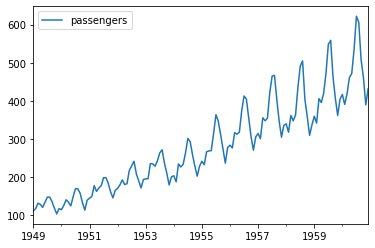

In [30]:
df_flights.plot()

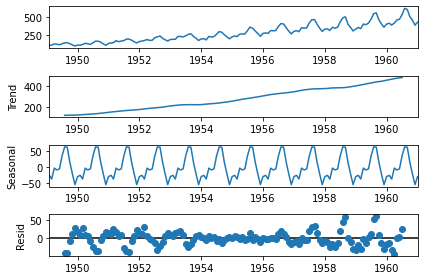

In [33]:
decomp = seasonal_decompose(df_flights)

decomp.plot();

<AxesSubplot:>

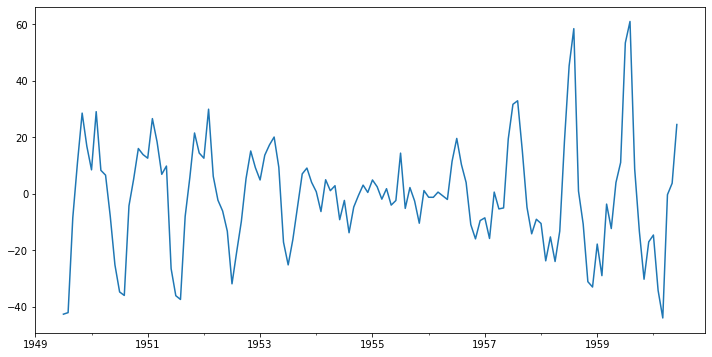

In [34]:
decomp.resid.plot(figsize=(12, 6))

<AxesSubplot:>

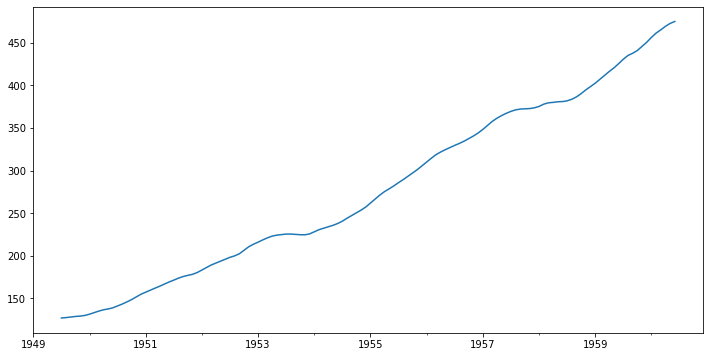

In [35]:
decomp.trend.plot(figsize=(12, 6))

<AxesSubplot:>

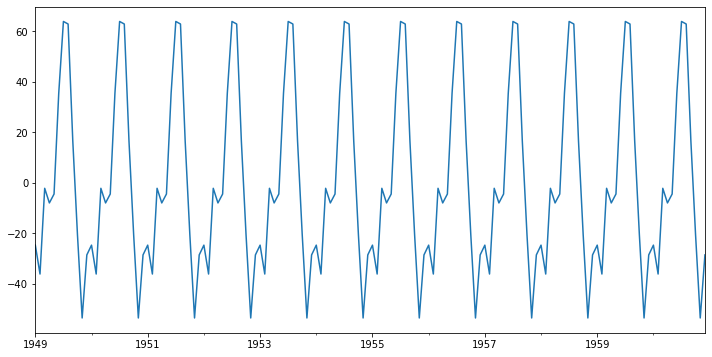

In [37]:
# Sazonalidade
decomp.seasonal.plot(figsize=(12, 6))

# Forecasting (modelos de previsão) de Séries Temporais

## Introdução

Os modelos que estudaremos serão utilizados para resolver um tipo de problema que é classificado como um **problema de regressão**. Estes problemas são aqueles em que o que desejamos modelar/prever **é um valor numérico contínuo**, que no nosso caso será o próprio valor da série temporal (em instantes futuros).

O tipo mais simples de modelo de regressão é a **regressão linear**, que consiste em uma linha reta que relaciona **y** (que é o que queremos prever, o output, comumente chamado de **target**) com **X** (os atributos utilizados para determinar o target, comumente chamados de **preditores** ou **features**). 

Os modelos preditivos de séries temporais que veremos a seguir, são modelos de regressão -- mas cujos preditores são os **valores passados da própria série**. É por isso que estes modelos são chamados de **autorregressivos**, pois o target e as features se referem à mesma quantidade: os valores da própria série temporal! Com a importante diferença de que, naturalmente, o target objetiva valores **futuros** da série.


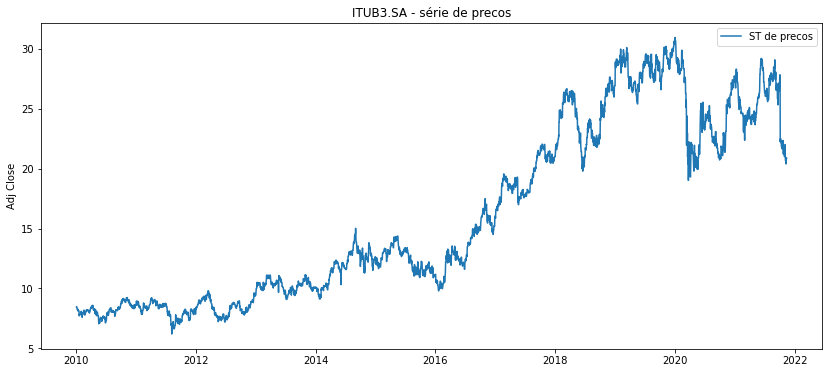

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from pandas_datareader.data import DataReader

# simbolo do ativo
simbolo = 'ITUB3.SA'

# lê os dados da série de preços
df = DataReader(simbolo, data_source='yahoo', start='2010')
precos = df["Adj Close"]

# necessário pra preencher datas faltando -- isso é importante para os modelos!
idx = pd.date_range(precos.index[0], precos.index[-1])
precos.index = pd.DatetimeIndex(precos.index)
precos = precos.reindex(idx, method='ffill')

plt.figure(figsize=(14, 6))
plt.title(simbolo + " - série de precos")

sns.lineplot(x=precos.index, y=precos, label="ST de precos")

plt.legend()
plt.show()

## Autocorrelação

Um dos conceitos mais importantes que permeará nossos modelos autorregressivos será o de **autocorrelação**, que nada mais é que a **correlação da série temporal com uma cópia dela mesma**, mas de uma forma **defasada** (ou seja, tomando cópias intervalados por períodos denominados **lags**):

<img src="https://i1.wp.com/www.business-science.io/assets/lag-explanation.PNG?w=584" width=400>

A depender do sinal da autocorreção, temos comportamentos diferentes:

- autocorrelação positiva: **momentum** ou **trend following**
- autocorrelação negativa: **mean reversion**

<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Positive-and-negative-autocorrelation.png" width=450>

Para visualizar a autocorrelação, é muito comum que utilizemos os plots **ACF** e **PACF**:


### **1. Função de Autocorrelação - Auto Correlation Function (ACF)**

A função de autocorrelação, ACF, é calculada considerando **todos os instantes de tempo intermediários dentro do lag (defasagem) a partir do primeiro instante de tempo**.

É muito comum visualizá-la com auxílio da biblioteca statsmodels:

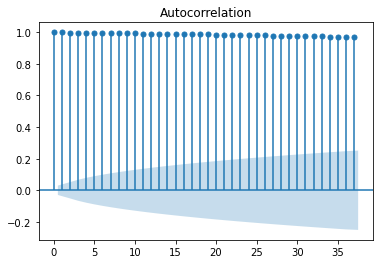

In [39]:
# importando o método
from statsmodels.graphics.tsaplots import plot_acf

# plota a ACF
plot_acf(precos)
plt.show()

### **2. Função de Autocorrelação Parcial - Partial Auto Correlation Function (PACF)**

A função de autocorrelação parcial, PACF, é calculada considerando **apenas os instantes de tempo do lag, sem considerar os instantes intermediários**.

Também há um método do statsmodels para visualizarmos a PACF:

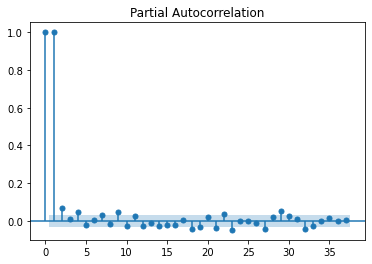

In [40]:
# importando o método
from statsmodels.graphics.tsaplots import plot_pacf

# plota a PACF
plot_pacf(precos)
plt.show()

### **3. White Noise**

Um importante componente dos modelos que criaremos será o **white noise** (ruído branco), que será responsável por capturar as variações aleatórias na série, que não podem ser estatisticamente modeladas.

O white noise é caracterizado por ter:

- média constante;
- variância constante;
- autocorrelação zero em todas lags.

Um exemplo de white noise:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/White-Noise-Series-Line-Plot.png" width=500>

### **4. Random Walk**

Além do white noise, um tipo de série temporal de grande interesse são os **random walks** (**passeios aleatórios**).

Diferentemente do white noise, que consiste em **valores sucessivos aleatórios e descorrelacionados**, os passeios aleatórios consistem em sequências tais que **valores seguintes são construídos a partir de valores anteriores**. Por isso, passeios aleatórios são **modeláveis**, formando a base dos modelos que estudaremos.

A forma mais simples de modelar um passeio aleatório é tomando o preço de hoje como sendo o preço de ontem + ruído, além de um termo adicional independente \\( \mu \\) chamado de **drift**, isto é,

\\[ P_t = \mu + P_{t-1} + \epsilon_t \\]

Ou seja, a mudança de preço é white noise com média \\( \mu \\):

\\[ P_t - P_{t-1} = \mu + \epsilon_t \\]

### **5. Estacionariedade**

Uma série temporal é dita **estacionária** quando ela se desenvolve no tempo aleatoriamente ao redor de uma **média constante**, e com **variância constante**, refletindo um equilíbrio estável:

<img src="https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png" width=550><br>

<img src="https://miro.medium.com/max/1147/1*xdblkZyg6YmmReAkZHUksw.png" width=650>


> -**Random walks** são exemplos de séries **não estacionárias**:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/Random-Walk-Line-Plot.png" width=450>

> **Séries sazonais com tendência de crescimento** também não são estacionárias:

<img src="https://anomaly.io/wp-content/uploads/2015/12/multiplicative-model.png" width=450>

> -**White noise** é estacionário:

<img src="https://www.researchgate.net/publication/279249485/figure/fig10/AS:272660147994627@1442018653078/An-example-of-a-stationary-time-series-specifically-a-series-of-uncorrelated-white.png" width=500>

Para avaliarmos se uma série temporal é ou não estacionária, fazemos o [teste de Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test).

In [41]:
# teste para verificar se a série temporal é ou não estacionária
from statsmodels.tsa.stattools import adfuller

# o elemento de índice 1 da tupla retornada pelo teste é o p-value
p = adfuller(precos)[1]

print("\np-value:", p)

# interpretação do teste
# nível de confiança de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser não-estacionaria")
else:
    print("\nRejeição da H_0: amostra é estacionária")


p-value: 0.600395004853536

Falha em rejeitar H_0: amostra parece ser não-estacionaria


In [43]:
# alternativa para o script anterior
y = precos.values

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05: # com a significância de 5%
    print('É Estacionária!')
else:
    print('Não é Estacionária!')

ADF Statistic: -1.361909
p-value: 0.600395
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Não é Estacionária!


## Transformação de Séries Temporais 

Dado que a Série Temporal pode __não ser estacionária__, podemos aplicar algumas transformações que possa auxiliar na manipulação dos nosso dados e assim deixar a série o mais próxima de ser estacionária.<br><br>

[Neste Link](https://people.duke.edu/~rnau/411home.htm) da Duke University, têm-se um guia bem detalhado para os diversos passo a passo em todo o processo de _Time Series Forecasting_, inclusive sobre os tipos de transformações que podem ser feitas:

- Calcular o __log__ de todas as observações:

In [44]:
y = np.log(precos.values)

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -1.145864
p-value: 0.696440
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Não é Estacionário


- Calcular a __raiz quadrada__ de todas as observações:

In [45]:
y = np.sqrt(precos.values)

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -1.276602
p-value: 0.639808
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Não é Estacionário


- Calcular a __raiz cúbica__ de todas as observações:

In [46]:
y = np.cbrt(precos.values)

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -1.140603
p-value: 0.698611
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Não é Estacionário


- Utiliza a função do pandas [pct_change()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) e calcula o percentual de  diferença de todas as observações:

In [47]:
y = precos.pct_change().dropna().values

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -25.663516
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
É Estacionário


Uma outra alternativa para **tornarmos uma série não-estacionária em estacionária**, podemos tomar as variações entre diferentes instantes de tempo, o que fazemos com o método `diff()`: \\( P_t - P_{t-1} \\) do pandas ou `np.diff` do numpy

In [48]:
# dropna() pq não é possível definir a primeira diferença!
difs = precos.diff().dropna()

In [52]:
difs

2010-01-05    0.013624
2010-01-06    0.000000
2010-01-07   -0.081783
2010-01-08   -0.095425
2010-01-09    0.000000
                ...   
2021-11-08   -0.049999
2021-11-09   -0.220001
2021-11-10    0.510000
2021-11-11    0.010000
2021-11-12   -0.030001
Freq: D, Name: Adj Close, Length: 4330, dtype: float64

In [53]:
y = difs.values

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -11.154141
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
É Estacionário


Agora que conhecemos o importante conceito de estacionaridade, vamos introduzir dois procedimentos que são utilizados **para modelar processos estacionários**.

## **Modelos AR**

O primeiro modelo que vamos tratar é o **Modelo AutoRegressivo** (daí o **AR**). Este modelo estabelece uma relação muito precisa entre diferentes instantes de tempo, expressa a seguir como o **modelo autorregressivo de ordem \\( p \\) - \\( \text{AR}(p) \\):**


\\[ R_t = \mu + \sum_{i=1}^p \phi_i R_{t-i} + \epsilon_t \ ,  \\]

Ou seja,

\\[ R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \cdots + \phi_p R_{t-p} + \epsilon_t \ ,  \\]

Onde:

- \\( R_t \\) é o instante atual;
- \\( p \\) é o número de lags considerado no modelo (também chamado de **ordem** do modelo);
- \\( R_{t-p} \\) é o instante de tempo passados p lags;
- \\( \phi_p \\) é o respectivo coeficiente da PACF.

Um bom modelo será um que utiliza um número \\( p \\) de lags da PACF fora do cone de confiança (ou seja, estatisticamente significantes).

**Importante**: modelos AR apenas são capazes de modelar **séries estacionárias**! Então, antes de construir um modelo AR, é necessário garantir que a série a ser modelada é estacionária! 

Para treinarmos um modelo \\( \text{AR}(p) \\) para nossa série temporal, vamos utilizar o submódulo `tatsmodels.tsa.arima_model` da [statsmodels](https://www.statsmodels.org/stable/tsa.html)


In [55]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [56]:
# importa a classe do modelo
from statsmodels.tsa.arima_model import ARMA

# fit do modelo utilizando a série "difs" (que é estacionária)
# o parâmetro "order" indica qual será a ordem do modelo. Neste caso, p=1
modelo = ARMA(difs, order=(1, 0)).fit()

Após ajustar(dar o fit) o modelo, podemos dar uma olhada em informações com o método `summary()`:

In [57]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 4330
Model:                     ARMA(1, 0)   Log Likelihood                -581.462
Method:                       css-mle   S.D. of innovations              0.277
Date:                Fri, 12 Nov 2021   AIC                           1168.924
Time:                        21:26:01   BIC                           1188.044
Sample:                    01-05-2010   HQIC                          1175.674
                         - 11-12-2021                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0029      0.004      0.726      0.468      -0.005       0.011
ar.L1.Adj Close    -0.0650      0.015     -4.288      0.000      -0.095      -0.035
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -15.3785           +0.0000j           15.3785            0.5000
-----------------------------------------------------------------------------
"""

Para visualizarmos as predições, podemos utilizar o seguinte método:

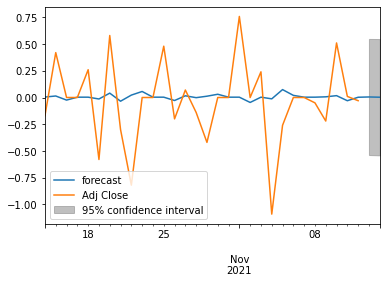

In [58]:
# definindo o número de dias para fazer o teste das predições
num_test = 30
difs_test = difs.iloc[-num_test:]

# plotando as predições juntamente com os valores originais
# o argumento "start" indica o início da janela de predição, e "end", o final
# utilizamos o dt.timedelta() pra indicaqr que queremos previsões de 2 dias no futuro
modelo.plot_predict(start=difs_test.index[0], end=difs_test.index[-1] + dt.timedelta(days=2))

plt.show()

## **Modelos MA**

Vamos tratar agora do **Modelo de Média Móvel** (**Moving Average**, daí o **MA**). 

Diferente dos modelos AR, os modelos MA estabelecem uma relação não entre os valores de diferentes instantes de tempo, mas sim entre **os ruídos de diferentes instantes de tempo**. Esta relação é expressa a seguir como o **modelo de média móvel de ordem \\( q \\) - \\( \text{MA}(q) \\):**

\\[ R_t = \mu + \sum_{i=1}^q \theta_i \epsilon_{t-i} + \epsilon_t \ ,  \\]

Ou seja,

\\[ R_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t \ , \\]

Onde:

- \\( R_t \\) é o instante atual;
- \\( q \\) é o número de lags considerado no modelo (também chamado de **ordem** do modelo);
- \\( \epsilon_{t-q} \\) é o ruído entre o instante atual e o instante após q lags;
- \\( \theta_q \\) é o respectivo coeficiente da ACF.

**Importante**: modelos MA também apenas são capazes de modelar **séries estacionárias**!

Um bom modelo será um que utiliza um número \\( q \\) de lags da ACF fora do cone de confiança (ou seja, estatisticamente significantes).

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                 4330
Model:                     ARMA(0, 1)   Log Likelihood                -581.237
Method:                       css-mle   S.D. of innovations              0.277
Date:                Fri, 12 Nov 2021   AIC                           1168.473
Time:                        21:33:00   BIC                           1187.593
Sample:                    01-05-2010   HQIC                          1175.223
                         - 11-12-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0029      0.004      0.731      0.465      -0.005       0.011
ma.L1.Adj Close    -0.0668      0.015     -4.340      0.000      -0.097      -0.037
                                

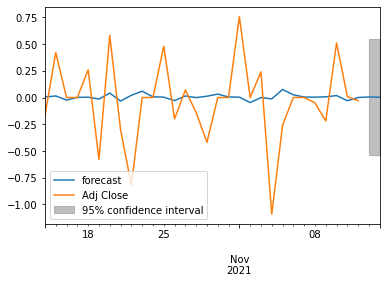

In [59]:
# importa a classe do modelo
from statsmodels.tsa.arima_model import ARMA

# fit do modelo utilizando a série "difs" (que é estacionária)
# o parâmetro "order" indica qual será a ordem do modelo. Neste caso, q=1
modelo = ARMA(difs, order=(0, 1)).fit()

# summary
print(modelo.summary())

# definindo o número de dias para fazer o teste das predições
num_test = 30
difs_test = difs.iloc[-num_test:]

# plotando as predições juntamente com os valores originais, até 2 dias no futuro
modelo.plot_predict(start=difs_test.index[0], end=difs_test.index[-1] + dt.timedelta(days=2))

plt.show()

## **Modelos ARMA**

Os modelos ARMA, como o nome indica, são modelos compostos por ambas as componentes AR e MA. O modelo \\( \text{ARMA}(p, q) \\) é dado por:

\\[ R_t = \mu + \sum_{i=1}^p \phi_i R_{t-i} + \sum_{i=1}^q \theta_i \epsilon_{t-i} + \epsilon_t \ .  \\]

**Importante**: modelos ARMA também apenas são capazes de modelar **séries estacionárias**!

Uma pergunta natural é: em que caso usar qual modelo?

Uma resposta simples é: tente diferentes modelos!

Uma resposta mais educada seria:

<img src="https://image1.slideserve.com/1710867/slide34-l.jpg" width=400>


                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                 4330
Model:                     ARMA(2, 2)   Log Likelihood                -578.103
Method:                       css-mle   S.D. of innovations              0.277
Date:                Fri, 12 Nov 2021   AIC                           1168.206
Time:                        21:41:45   BIC                           1206.446
Sample:                    01-05-2010   HQIC                          1181.706
                         - 11-12-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0029      0.004      0.789      0.430      -0.004       0.010
ar.L1.Adj Close     0.0959      0.226      0.425      0.671      -0.346       0.538
ar.L2.Adj Close     0.3882      

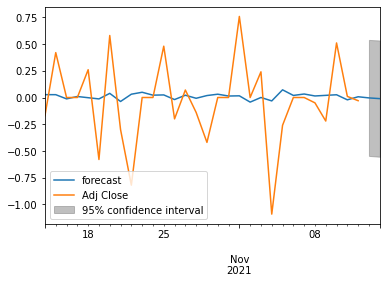

In [60]:
# importa a classe do modelo
from statsmodels.tsa.arima_model import ARMA

# fit do modelo utilizando a série "difs" (que é estacionária)
# o parâmetro "order" indica qual será a ordem do modelo. Neste caso, p=q=2
modelo = ARMA(difs, order=(2, 2)).fit()

# summary
print(modelo.summary())

# definindo o número de dias para fazer o teste das predições
num_test = 30
difs_test = difs.iloc[-num_test:]

# plotando as predições juntamente com os valores originais, até 2 dias no futuro
modelo.plot_predict(start=difs_test.index[0], end=difs_test.index[-1] + dt.timedelta(days=2))

plt.show()

## **Modelos ARIMA**

Por fim, chegamos ao modelo mais complexo que aprenderemos, o **AutoRegressive Integrated Moving Average**.

Estes modelos se diferenciam do ARMA ao incorporar o procedimento de **diferenciação** da série temporal **original e não estacionária**. Este procedimento faz com que a série se torne estacionária para que o forecasting seja feito. Então, como passo final, a diferenciação é revertida com a **integração**, o que faz com que as predições sejam feitas em termos dos valores originais -- daí o "I": a série original, que foi diferenciada, é a forma **integrada** da série estacionária, que foi diferenciada.

Assim, poderemos com o ARIMA utilizar diretamente as séries de preços, sem a necessidade de tornar esta série estacionária!

Os modelos \\( \text{ARIMA}(p, d, q) \\) têm as seguintes componentes:

- p: número de defasagens autoregressivas;
- d: ordem da diferenciação das defasagens;
- q: número de defasagens das médias móveis.

Vamos à construção do modelo!


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 4330
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -580.036
Method:                       css-mle   S.D. of innovations              0.277
Date:                Fri, 12 Nov 2021   AIC                           1168.071
Time:                        21:51:31   BIC                           1193.565
Sample:                    01-05-2010   HQIC                          1177.072
                         - 11-12-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0029      0.004      0.773      0.439      -0.004       0.010
ar.L1.D.Adj Close     0.4808      0.237      2.026      0.043       0.016       0.946
ma.L1.D.Adj Close    -0.

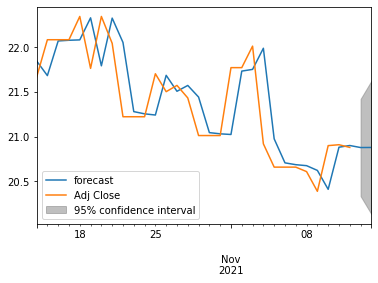

In [61]:
# importa a classe do modelo
from statsmodels.tsa.arima_model import ARIMA

# fit do modelo utilizando a série "precos" (a série original, não-estacionária)
# o parâmetro "order" indica qual será a ordem do modelo. Neste caso, p=d=q=1
modelo = ARIMA(precos, order=(1, 1, 1)).fit()

# summary
print(modelo.summary())

# definindo o número de dias para fazer o teste das predições
num_test = 30
difs_test = difs.iloc[-num_test:]

# plotando as predições juntamente com os valores originais, até 2 dias no futuro
modelo.plot_predict(start=difs_test.index[0], end=difs_test.index[-1] + dt.timedelta(days=2))

plt.show()

Uma forma de determinar o valor de p, q e d, é usando o método iterativo

### Método iterativo

O método iterativo funcionaria como um _GridSearch_ onde testaremos exaustivamente diversas combinações de parâmetros para (p, d, q). As principais desvantagens de partir por esse método são __tempo de processamento__ e __não necessária todas as combinações de parâmetros vão funcionar no ARIMA__.
<br><br>
Para acompanhar com o melhor resultado para a combinação de parâmetros, iremos utilizar a métrica __AIC__ (_Akaike's Information Criterion_), onde quanto menor o valor melhor a combinação de parâmetros para o ARIMA (o valor de AIC pode ser negativo!):

In [67]:
y = precos.values

In [68]:
import statsmodels

ls_ar, ls_i, ls_ma, ls_aic = [], [], [], []

i = 1
for ar in range(0, 2):
    for ma in range(0, 2):
        model = statsmodels.tsa.arima_model.ARIMA(y, order = (ar, i, ma))

        arima = model.fit(disp=0)
        
        ls_ar.append(ar)
        ls_i.append(i)
        ls_ma.append(ma)
        ls_aic.append(arima.aic)

In [69]:
# criar o dataframe com as opçoes testadas
df_ic = pd.DataFrame({'AR': ls_ar, 
                      'I': ls_i,
                      'MA': ls_ma,
                      'AIC': ls_aic})

df_ic.sort_values(['AIC'])

,AR,I,MA,AIC
3,1,1,1,1168.071367
1,0,1,1,1168.473175
2,1,1,0,1168.924043
0,0,1,0,1185.275734


A melhor combinação de parâmetros para esse caso foi (p, d, q) = (1, 1, 1)

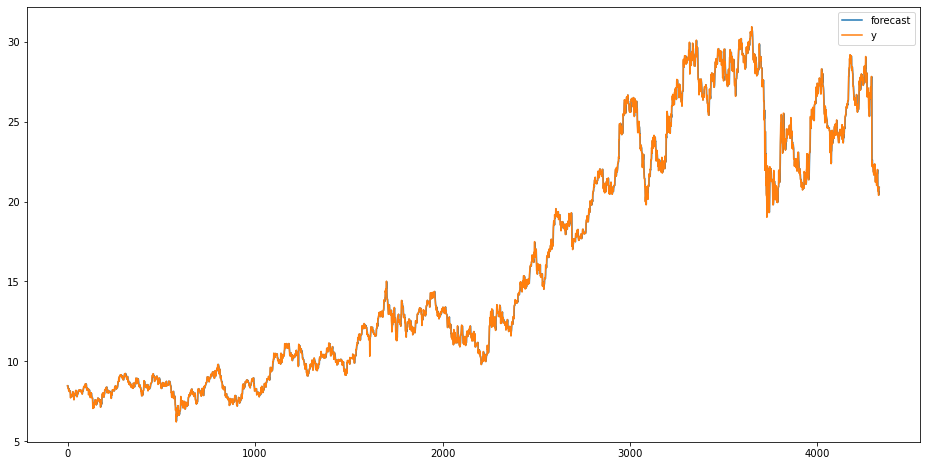

In [72]:
# Treinando o modelo ARIMA
mod = statsmodels.tsa.arima_model.ARIMA(y, order = (1, 1, 1))

arima = mod.fit(disp=0)

# Gráfico das predições em relação ao real
dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
arima.plot_predict(dynamic=False, ax=ax)
plt.show()